## 회귀분석

In [1]:
import pandas as pd

In [2]:
anal_df = pd.read_csv("C:/data/now_used/1015_data3.csv")
anal_df.head(5)

,건축물대장코드,구시군,읍면동,번,지,입주일,상가유형,지하총층,지상총층,연면적m2,...,주변세대수점수,주변평당가점수,상권코드명,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,공시지가,행정동생활인구
0,11110-10014,종로구,동숭동,1,114,1982-12-24,근린상가,1,5,1563.66,...,1.176,10.477,이화장길,1276469803,92138,926358383,350111420,131091.221409,22840000,38293.0
1,11110-100180009,종로구,동숭동,1,67,2008-07-03,기타상가,4,5,8585.08,...,1.207,10.754,이화장길,1276469803,92138,926358383,350111420,66131.584897,16310000,38293.0
2,11110-100184402,종로구,관훈동,186,0,2008-12-29,근린상가,0,3,172.11,...,0.363,19.104,계동길,725431028,41102,530637184,194793844,101021.253105,24600000,86083.0
3,11110-100190514,종로구,누하동,245,6,2011-09-28,근린상가,0,4,233.03,...,1.979,16.353,자하문로7길,1266093633,59989,952608422,313485211,67634.444078,7727000,40687.0
4,11110-100190842,종로구,효제동,19,3,2011-10-14,근린상가,0,5,253.80,...,0.810,10.063,율곡로16길,701283928,59235,586470792,114813136,112721.417069,4878000,30695.0


In [3]:
# 더미변수 추가

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['주차대수']]

anal_df['주차가능여부'] = lst

lst = []
[lst.append(1) if i > 0 else lst.append(0) for i in anal_df['승강기수']]

anal_df['승강기여부'] = lst

In [4]:
anal_df.columns

Index(['건축물대장코드', '구시군', '읍면동', '번', '지', '입주일', '상가유형', '지하총층', '지상총층',
       '연면적m2', '주차대수', '승강기수', '경도', '위도', 'usage_area', 'cont_area', 'RENT',
       'rent_ua', 'rent_ca', 'floor', '전철역명', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '가까운아파트', '가까운아파트총세대수', '가까운아파트평균평당가',
       '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수',
       '평균주중매출금액', '평균주말매출금액', '편의점임대료', '공시지가', '행정동생활인구', '주차가능여부', '승강기여부'],
      dtype='object')

In [5]:
print(len(anal_df), len(anal_df['건축물대장코드'].unique()))

9262 9262


In [6]:
anal_df = anal_df[['건축물대장코드', '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', '상권코드명',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료','주차가능여부', '승강기여부','행정동생활인구']]

In [7]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 행정동생활인구 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:29:03   Log-Likelihood:                -22560.
No. Observations:                9262   AIC:                         4.518e+04
Df Residuals:                    9234   BIC:                         4.538e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8842      0.206     13.989      0.000       2.480       3.288
usage_area     -0.0005   4.83e-05    -10.141      0.000      -0.001      -0.000
cont_area   -2.249e-06   4.49e-06     -0.501      0.617   -1.11e-05    6.56e-06
지하총층           -0.1510      0.048     -3.155      0.002      -0.245      -0.057
지상총층           -0.0719      0.019     -3.856      0.000      -0.109      -0.035
연면적m2       -3.085e-05    1.8e-05     -1.714      0.087   -6.61e-05    4.44e-06
주차대수            0.0005      0.002      0.299      0.765      -0.003       0.004
승강기수            0.1756      0.066      2.678      0.007       0.047       0.304
지하철거리m         -0.0275      0.011     -2.602      0.009      -0.048      -0.007
승객수점수        4.206e-06   4.98e-07      8.444      0.000    3.23e-06    5.18e-06
횡단보도거리m        -0.0019      0.001     -2.686      0.007      -0.003      -0.001
건물별전기사용량     4.433e-06   1.13e-06      3.934      0.000    2.22e-06    6.64e-06
본번별평균사용량     2.724e-06   7.93e-07      3.435      0.001    1.17e-06    4.28e-06
건물연차           -0.0115      0.003     -3.509      0.000      -0.018      -0.005
공시지가         3.161e-07   6.58e-09     48.051      0.000    3.03e-07    3.29e-07
가까운아파트총세대수      0.0001   7.22e-05      1.726      0.084   -1.69e-05       0.000
가까운아파트평균평당가    -0.0001   3.29e-05     -4.038      0.000      -0.000   -6.84e-05
아파트거리          -0.0001      0.000     -0.708      0.479      -0.000       0.000
주변세대수점수         0.0360      0.010      3.658      0.000       0.017       0.055
주변평당가점수        -0.0021      0.001     -1.839      0.066      -0.004       0.000
평균월매출금액       1.73e-10   2.89e-11      5.991      0.000    1.16e-10     2.3e-10
평균월매출건수      -5.89e-06   1.49e-06     -3.943      0.000   -8.82e-06   -2.96e-06
평균주중매출금액     6.604e-11   4.41e-11      1.497      0.134   -2.04e-11    1.53e-10
평균주말매출금액      1.66e-09   2.34e-10      7.090      0.000     1.2e-09    2.12e-09
편의점임대료       3.314e-06   5.58e-07      5.940      0.000    2.22e-06    4.41e-06
행정동생활인구     -4.136e-06   1.07e-06     -3.855      0.000   -6.24e-06   -2.03e-06
주차가능여부         -0.2102      0.070     -2.985      0.003      -0.348      -0.072
승강기여부           0.2435      0.113      2.163      0.031       0.023       0.464
==============================================================================
Omnibus:                     7689.596   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511349.286
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      38.698   Cond. No.                     1.10e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd29e24d60>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd29e38460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd29e24a00>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd29e38b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd29e38e20>],
 'means': []}

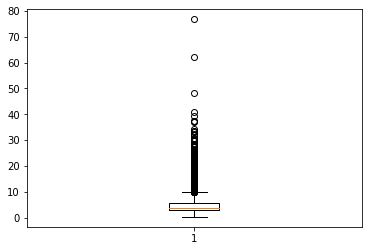

In [9]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [10]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [11]:
anal_df2.columns

Index(['건축물대장코드', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       'cont_area', 'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량',
       '횡단보도거리m', '건물연차', '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리',
       '주변세대수점수', '주변평당가점수', '상권코드명', '평균월매출금액', '평균월매출건수', '평균주중매출금액',
       '평균주말매출금액', '편의점임대료', '주차가능여부', '승강기여부', '행정동생활인구'],
      dtype='object')

In [13]:
z = anal_df2[[ '지하총층', '지상총층','연면적m2', '주차대수',
                   '승강기수', 'usage_area', 'cont_area',
       'rent_ua','지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', 
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '행정동생활인구','주차가능여부', '승강기여부']]

In [14]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-14-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
0,1,5,1563.66,0,1,15.50,15.50,NaN,1.082077,71533.898,...,1.176,10.477,1276469803,92138,926358383,350111420,131091.221409,38293.0,0,1
1,4,5,8585.08,7,4,103.00,143.92,NaN,1.373136,117064.164,...,1.207,10.754,1276469803,92138,926358383,350111420,66131.584897,38293.0,1,1
2,0,3,172.11,0,1,185.00,200.00,NaN,2.508637,46623.003,...,0.363,19.104,725431028,41102,530637184,194793844,101021.253105,86083.0,0,1
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9258,1,3,988.04,0,0,41.19,41.19,NaN,0.729846,33569.452,...,12.853,39.510,1138515459,61110,811089104,327426355,37556.499110,59355.0,0,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,7.339,47.818,731403749,43065,546770943,184632806,39411.064842,55551.0,1,0


In [15]:
z.isnull().sum()

지하총층             0
지상총층             0
연면적m2            0
주차대수             0
승강기수             0
usage_area       0
cont_area        0
rent_ua        542
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트총세대수       0
가까운아파트평균평당가      0
아파트거리            0
주변세대수점수          0
주변평당가점수          0
평균월매출금액          0
평균월매출건수          0
평균주중매출금액         0
평균주말매출금액         0
편의점임대료           0
행정동생활인구          0
주차가능여부           0
승강기여부            0
dtype: int64

In [16]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
연면적m2          0
주차대수           0
승강기수           0
usage_area     0
cont_area      0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트총세대수     0
가까운아파트평균평당가    0
아파트거리          0
주변세대수점수        0
주변평당가점수        0
평균월매출금액        0
평균월매출건수        0
평균주중매출금액       0
평균주말매출금액       0
편의점임대료         0
행정동생활인구        0
주차가능여부         0
승강기여부          0
dtype: int64

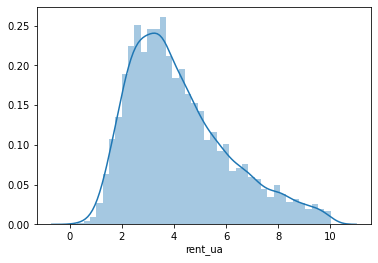

In [17]:
sns.distplot(z.iloc[:,7])
plt.show()

In [18]:
import scipy as sp
import scipy.stats as stats

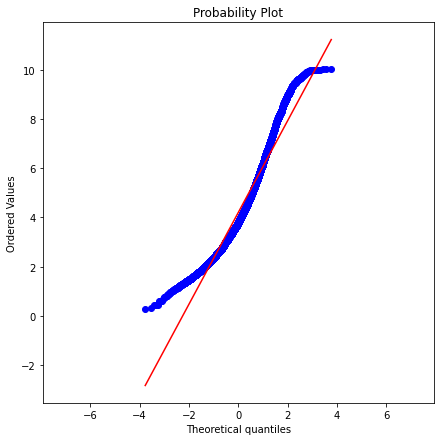

In [19]:
x = z.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [20]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-20-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1.006,8.175,1276469803,92138,926358383,350111420,85005.100306,38293.0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,0.216,14.130,725431028,41102,530637184,194793844,112503.643253,12726.0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,1.157,19.706,845419656,45138,598585337,246834320,38862.980235,105763.0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,7.339,47.818,731403749,43065,546770943,184632806,39411.064842,55551.0,1,0


In [21]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 3 to 9261
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8720 non-null   int64  
 1   지상총층         8720 non-null   int64  
 2   연면적m2        8720 non-null   float64
 3   주차대수         8720 non-null   int64  
 4   승강기수         8720 non-null   int64  
 5   usage_area   8720 non-null   float64
 6   cont_area    8720 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8720 non-null   float64
 9   승객수점수        8720 non-null   float64
 10  건물별전기사용량     8720 non-null   int64  
 11  본번별평균사용량     8720 non-null   float64
 12  횡단보도거리m      8720 non-null   float64
 13  건물연차         8720 non-null   int64  
 14  공시지가         8720 non-null   int64  
 15  가까운아파트총세대수   8720 non-null   int64  
 16  가까운아파트평균평당가  8720 non-null   float64
 17  아파트거리        8720 non-null   float64
 18  주변세대수점수      8720 non-null   float64
 19  주변평당가점

In [22]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1.006,8.175,1276469803,92138,926358383,350111420,85005.100306,38293.0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,0.216,14.130,725431028,41102,530637184,194793844,112503.643253,12726.0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,1.157,19.706,845419656,45138,598585337,246834320,38862.980235,105763.0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,7.339,47.818,731403749,43065,546770943,184632806,39411.064842,55551.0,1,0


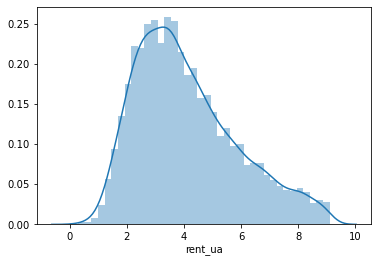

In [23]:
sns.distplot(z1.iloc[:,7])
plt.show()

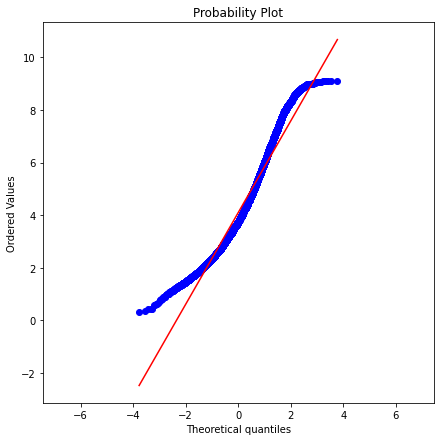

In [24]:
x = z1.iloc[:,7]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [25]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
지하총층,1.000000,0.474845,0.575411,0.310545,0.372233,0.177908,0.216480,0.115560,-0.006472,0.152229,...,0.029312,0.140016,0.007491,0.055534,0.083255,0.061713,0.132663,0.149450,0.213229,0.338607
지상총층,0.474845,1.000000,0.725013,0.558848,0.620730,0.255147,0.288443,0.155214,-0.020228,0.173070,...,-0.006622,0.173117,0.015235,0.119241,0.141506,0.108190,0.151624,0.167042,0.485987,0.611718
연면적m2,0.575411,0.725013,1.000000,0.571064,0.549044,0.306538,0.350283,0.177112,0.005932,0.147092,...,0.029986,0.199946,-0.004998,0.076554,0.114244,0.077690,0.140220,0.167837,0.415303,0.534493
주차대수,0.310545,0.558848,0.571064,1.000000,0.453533,0.208470,0.236113,0.086560,0.041764,0.063499,...,-0.004097,0.163040,0.008934,0.062945,0.093308,0.084919,0.094971,0.160498,0.888412,0.438523
승강기수,0.372233,0.620730,0.549044,0.453533,1.000000,0.244907,0.275890,0.183578,-0.043667,0.174911,...,0.018548,0.150619,0.005921,0.092296,0.123879,0.092000,0.149497,0.138937,0.341575,0.993957
usage_area,0.177908,0.255147,0.306538,0.208470,0.244907,1.000000,0.970796,0.042477,-0.057932,0.274192,...,-0.080894,0.078192,0.061383,0.159812,0.191173,0.189792,0.145685,0.190157,0.173963,0.248884
cont_area,0.216480,0.288443,0.350283,0.236113,0.275890,0.970796,1.000000,0.082693,-0.058046,0.286391,...,-0.079916,0.099026,0.059372,0.161847,0.196044,0.190876,0.161154,0.203771,0.190946,0.275399
rent_ua,0.115560,0.155214,0.177112,0.086560,0.183578,0.042477,0.082693,1.000000,-0.228621,0.349202,...,-0.044502,0.160448,0.115727,0.268944,0.285700,0.293223,0.299452,0.193973,0.045416,0.175310
지하철거리m,-0.006472,-0.020228,0.005932,0.041764,-0.043667,-0.057932,-0.058046,-0.228621,1.000000,-0.471876,...,0.049364,-0.070064,-0.175726,-0.242985,-0.241281,-0.215861,-0.259660,-0.064476,0.059545,-0.040728
승객수점수,0.152229,0.173070,0.147092,0.063499,0.174911,0.274192,0.286391,0.349202,-0.471876,1.000000,...,-0.145339,0.046900,0.226258,0.455541,0.446685,0.397073,0.343167,0.232939,0.032128,0.169657


In [26]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


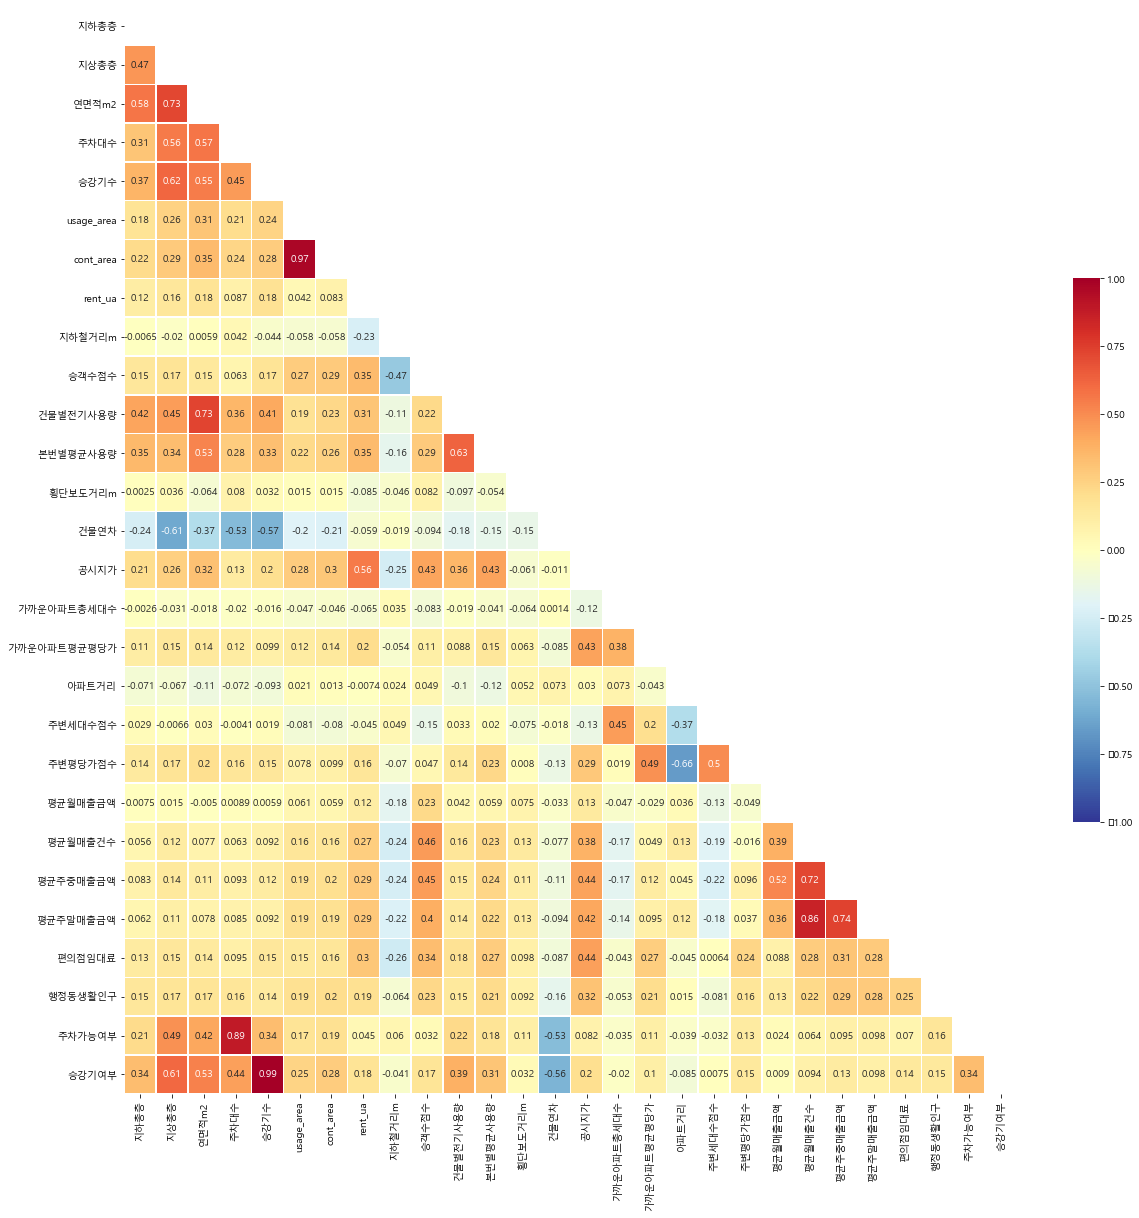

In [27]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [28]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 행정동생활인구 + 주차가능여부 + 승강기여부', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     195.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:29:46   Log-Likelihood:                -22560.
No. Observations:                9262   AIC:                         4.518e+04
Df Residuals:                    9234   BIC:                         4.538e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.8842      0.206     13.989      0.000       2.480       3.288
usage_area     -0.0005   4.83e-05    -10.141      0.000      -0.001      -0.000
cont_area   -2.249e-06   4.49e-06     -0.501      0.617   -1.11e-05    6.56e-06
지하총층           -0.1510      0.048     -3.155      0.002      -0.245      -0.057
지상총층           -0.0719      0.019     -3.856      0.000      -0.109      -0.035
연면적m2       -3.085e-05    1.8e-05     -1.714      0.087   -6.61e-05    4.44e-06
주차대수            0.0005      0.002      0.299      0.765      -0.003       0.004
승강기수            0.1756      0.066      2.678      0.007       0.047       0.304
지하철거리m         -0.0275      0.011     -2.602      0.009      -0.048      -0.007
승객수점수        4.206e-06   4.98e-07      8.444      0.000    3.23e-06    5.18e-06
횡단보도거리m        -0.0019      0.001     -2.686      0.007      -0.003      -0.001
건물별전기사용량     4.433e-06   1.13e-06      3.934      0.000    2.22e-06    6.64e-06
본번별평균사용량     2.724e-06   7.93e-07      3.435      0.001    1.17e-06    4.28e-06
건물연차           -0.0115      0.003     -3.509      0.000      -0.018      -0.005
공시지가         3.161e-07   6.58e-09     48.051      0.000    3.03e-07    3.29e-07
가까운아파트총세대수      0.0001   7.22e-05      1.726      0.084   -1.69e-05       0.000
가까운아파트평균평당가    -0.0001   3.29e-05     -4.038      0.000      -0.000   -6.84e-05
아파트거리          -0.0001      0.000     -0.708      0.479      -0.000       0.000
주변세대수점수         0.0360      0.010      3.658      0.000       0.017       0.055
주변평당가점수        -0.0021      0.001     -1.839      0.066      -0.004       0.000
평균월매출금액       1.73e-10   2.89e-11      5.991      0.000    1.16e-10     2.3e-10
평균월매출건수      -5.89e-06   1.49e-06     -3.943      0.000   -8.82e-06   -2.96e-06
평균주중매출금액     6.604e-11   4.41e-11      1.497      0.134   -2.04e-11    1.53e-10
평균주말매출금액      1.66e-09   2.34e-10      7.090      0.000     1.2e-09    2.12e-09
편의점임대료       3.314e-06   5.58e-07      5.940      0.000    2.22e-06    4.41e-06
행정동생활인구     -4.136e-06   1.07e-06     -3.855      0.000   -6.24e-06   -2.03e-06
주차가능여부         -0.2102      0.070     -2.985      0.003      -0.348      -0.072
승강기여부           0.2435      0.113      2.163      0.031       0.023       0.464
==============================================================================
Omnibus:                     7689.596   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           511349.286
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      38.698   Cond. No.                     1.10e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

## 주요컬럼 이상치 제거
상관계수가 0.3 이상인 변수의 이상치를 제거한다.
* 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 편의점임대료

In [29]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8563 entries, 3 to 9261
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8563 non-null   int64  
 1   지상총층         8563 non-null   int64  
 2   연면적m2        8563 non-null   float64
 3   주차대수         8563 non-null   int64  
 4   승강기수         8563 non-null   int64  
 5   usage_area   8563 non-null   float64
 6   cont_area    8563 non-null   float64
 7   rent_ua      8563 non-null   float64
 8   지하철거리m       8563 non-null   float64
 9   승객수점수        8563 non-null   float64
 10  건물별전기사용량     8563 non-null   int64  
 11  본번별평균사용량     8563 non-null   float64
 12  횡단보도거리m      8563 non-null   float64
 13  건물연차         8563 non-null   int64  
 14  공시지가         8563 non-null   int64  
 15  가까운아파트총세대수   8563 non-null   int64  
 16  가까운아파트평균평당가  8563 non-null   float64
 17  아파트거리        8563 non-null   float64
 18  주변세대수점수      8563 non-null   float64
 19  주변평당가점

In [30]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-30-1eb64b94a9ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
6,5,6,3869.33,4,2,370.05,370.05,4.323740,2.095677,41692.829,...,1.006,8.175,1276469803,92138,926358383,350111420,85005.100306,38293.0,1,1
8,1,3,1211.93,5,0,76.03,76.03,5.392608,1.090460,59317.670,...,0.216,14.130,725431028,41102,530637184,194793844,112503.643253,12726.0,1,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9256,1,5,5068.70,15,0,440.82,450.82,4.196724,3.577587,47394.330,...,1.157,19.706,845419656,45138,598585337,246834320,38862.980235,105763.0,1,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0
9260,1,4,659.00,5,0,291.07,321.87,4.672416,6.165909,22247.037,...,7.339,47.818,731403749,43065,546770943,184632806,39411.064842,55551.0,1,0


In [31]:
# 건물별전기사용량 이상값 제거

q1 = z2["건물별전기사용량"].quantile(0.25)
q3 = z2["건물별전기사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z5 = z2.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-31-17f55af414cd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
10,1,3,582.39,5,0,140.00,140.00,2.714286,3.709688,59466.010,...,0.615,8.193,725431028,41102,530637184,194793844,112503.643253,12726.0,1,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,1.260,14.074,321750678,12670,238345356,83405321,42156.361778,39884.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,4.221,29.325,844447969,41392,603684567,240763402,51101.043093,51049.0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,26.066,41.068,1189200211,63610,856807483,332392728,37556.499110,30279.0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0


In [32]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-32-f294d06d6038>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,1.260,14.074,321750678,12670,238345356,83405321,42156.361778,39884.0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1.738,7.496,1276469803,92138,926358383,350111420,85005.100306,38293.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,4.221,29.325,844447969,41392,603684567,240763402,51101.043093,51049.0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,26.066,41.068,1189200211,63610,856807483,332392728,37556.499110,30279.0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0


In [33]:
# 공시지가 이상값 제거

q1 = z6["공시지가"].quantile(0.25)
q3 = z6["공시지가"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z7 = z6.copy()
z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-33-9075cfbc185d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["공시지가"][(z7["공시지가"] > (q3 + iqt)) | (z7["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,1.260,14.074,321750678,12670,238345356,83405321,42156.361778,39884.0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1.738,7.496,1276469803,92138,926358383,350111420,85005.100306,38293.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,4.221,29.325,844447969,41392,603684567,240763402,51101.043093,51049.0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,26.066,41.068,1189200211,63610,856807483,332392728,37556.499110,30279.0,0,0
9257,1,4,493.71,3,0,783.79,891.83,2.156190,4.357042,8921.374,...,18.968,40.630,237774734,14458,184722166,53052568,157349.896480,50099.0,1,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0


In [34]:
# 편의점임대료 이상값 제거

q1 = z7["편의점임대료"].quantile(0.25)
q3 = z7["편의점임대료"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z8 = z7.copy()
z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-34-fce20a1b0570>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["편의점임대료"][(z8["편의점임대료"] > (q3 + iqt)) | (z8["편의점임대료"] < (q1 - iqt))] = None


,지하총층,지상총층,연면적m2,주차대수,승강기수,usage_area,cont_area,rent_ua,지하철거리m,승객수점수,...,주변세대수점수,주변평당가점수,평균월매출금액,평균월매출건수,평균주중매출금액,평균주말매출금액,편의점임대료,행정동생활인구,주차가능여부,승강기여부
3,0,4,233.03,2,0,58.22,58.22,3.778770,4.791703,29040.490,...,1.979,16.353,1266093633,59989,952608422,313485211,67634.444078,40687.0,1,0
4,0,5,253.80,0,0,58.90,66.20,2.037351,3.818611,34219.916,...,0.810,10.063,701283928,59235,586470792,114813136,112721.417069,30695.0,0,0
9,1,4,458.95,0,0,73.03,73.03,4.792551,3.944218,24836.371,...,1.660,14.742,1132740284,82393,810808853,321931432,95483.870968,55931.0,0,0
12,1,2,185.67,0,0,69.30,69.30,3.030303,33.487931,4965.406,...,1.260,14.074,321750678,12670,238345356,83405321,42156.361778,39884.0,0,0
15,1,3,480.67,0,0,146.71,146.71,2.249335,3.241511,60826.450,...,1.738,7.496,1276469803,92138,926358383,350111420,85005.100306,38293.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9253,1,7,2256.70,16,0,1622.88,2078.64,4.929508,4.212383,23925.620,...,1.156,23.315,1255617586,56974,917748606,337868981,35753.147831,105763.0,1,0
9254,1,3,879.31,6,0,100.00,115.00,2.300000,1.606256,59177.336,...,4.221,29.325,844447969,41392,603684567,240763402,51101.043093,51049.0,1,0
9255,1,3,931.28,0,0,46.28,46.28,3.889369,3.223796,32689.020,...,26.066,41.068,1189200211,63610,856807483,332392728,37556.499110,30279.0,0,0
9259,1,2,741.99,4,0,127.60,127.60,3.761755,2.046134,16942.142,...,10.374,109.826,1138515459,61110,811089104,327426355,37556.499110,59355.0,1,0


## 회귀분석

In [35]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 행정동생활인구 + 주차가능여부 + 승강기여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     101.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:30:11   Log-Likelihood:                -10382.
No. Observations:                6108   AIC:                         2.082e+04
Df Residuals:                    6080   BIC:                         2.101e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1543      0.140     15.382      0.000       1.880       2.429
usage_area     -0.0004   6.04e-05     -6.983      0.000      -0.001      -0.000
cont_area    9.664e-05   4.56e-05      2.120      0.034    7.29e-06       0.000
지하총층           -0.2017      0.044     -4.538      0.000      -0.289      -0.115
지상총층           -0.0313      0.018     -1.716      0.086      -0.067       0.004
연면적m2          -0.0003    4.9e-05     -6.062      0.000      -0.000      -0.000
주차대수            0.0328      0.006      5.744      0.000       0.022       0.044
승강기수            0.4577      0.197      2.320      0.020       0.071       0.844
지하철거리m         -0.0048      0.006     -0.823      0.411      -0.016       0.007
승객수점수          5.1e-06    6.5e-07      7.852      0.000    3.83e-06    6.37e-06
횡단보도거리m        -0.0015      0.000     -3.856      0.000      -0.002      -0.001
건물별전기사용량     3.779e-05   4.96e-06      7.625      0.000    2.81e-05    4.75e-05
본번별평균사용량     2.024e-05   5.32e-06      3.802      0.000     9.8e-06    3.07e-05
건물연차           -0.0093      0.002     -4.626      0.000      -0.013      -0.005
공시지가         2.931e-07   9.16e-09     31.997      0.000    2.75e-07    3.11e-07
가까운아파트총세대수  -9.521e-05   4.54e-05     -2.099      0.036      -0.000   -6.28e-06
가까운아파트평균평당가 -2.711e-05   2.36e-05     -1.150      0.250   -7.33e-05    1.91e-05
아파트거리           0.0001      0.000      1.050      0.294      -0.000       0.000
주변세대수점수         0.0170      0.007      2.573      0.010       0.004       0.030
주변평당가점수     -8.418e-05      0.001     -0.071      0.943      -0.002       0.002
평균월매출금액      1.061e-10   2.06e-11      5.162      0.000    6.58e-11    1.46e-10
평균월매출건수     -1.573e-06   1.07e-06     -1.472      0.141   -3.67e-06    5.22e-07
평균주중매출금액    -1.886e-11   3.25e-11     -0.581      0.561   -8.25e-11    4.48e-11
평균주말매출금액      6.92e-10   1.62e-10      4.280      0.000    3.75e-10    1.01e-09
편의점임대료       1.309e-06   6.49e-07      2.017      0.044     3.7e-08    2.58e-06
행정동생활인구     -1.639e-06   7.13e-07     -2.297      0.022   -3.04e-06    -2.4e-07
주차가능여부         -0.2166      0.047     -4.648      0.000      -0.308      -0.125
승강기여부          -0.4005      0.205     -1.954      0.051      -0.802       0.001
==============================================================================
Omnibus:                      607.036   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.898
Skew:                           0.747   Prob(JB):                    1.07e-200
Kurtosis:                       4.177   Cond. No.                     2.41e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number i

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [36]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 'cont_area',
 '지하총층',
 '지상총층',
 '연면적m2',
 '주차대수',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트총세대수',
 '가까운아파트평균평당가',
 '아파트거리',
 '주변세대수점수',
 '주변평당가점수',
 '평균월매출금액',
 '평균월매출건수',
 '평균주중매출금액',
 '평균주말매출금액',
 '편의점임대료',
 '행정동생활인구',
 '주차가능여부',
 '승강기여부']

In [38]:
pd.options.display.float_format = '{:.5f}'.format

In [39]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,3.50687
1,cont_area,3.46947
2,지하총층,1.38679
3,지상총층,2.85765
4,연면적m2,26.89410
5,주차대수,22.52066
6,승강기수,27.26458
7,지하철거리m,1.24085
8,승객수점수,1.49476
9,횡단보도거리m,1.09754


C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


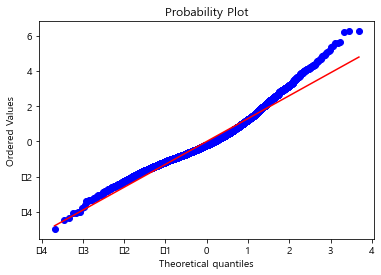

In [40]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + cont_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 가까운아파트평균평당가 + 아파트거리 + 주변세대수점수 + 주변평당가점수 + 평균월매출금액 + 평균월매출건수 + 평균주중매출금액 + 평균주말매출금액 + 편의점임대료 + 행정동생활인구 + 주차가능여부 + 승강기여부', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

## 모든변수

In [41]:
df = z8.copy()

df.columns

Index(['지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area', 'cont_area',
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '행정동생활인구',
       '주차가능여부', '승강기여부'],
      dtype='object')

In [42]:
df = df[['rent_ua', '지하총층', '지상총층', '연면적m2', '주차대수', '승강기수', 'usage_area',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차',
       '공시지가', '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수',
       '평균월매출금액', '평균월매출건수', '평균주중매출금액', '평균주말매출금액', '편의점임대료', '행정동생활인구',
       '주차가능여부', '승강기여부']]

In [43]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

X = df.iloc[:,1:]     # train/test data로 나눌 수 있게 내가 필요한 data만 담기
Y = df.iloc[:,0]      # label 만들기

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [45]:
rgs = KNeighborsRegressor(n_neighbors = 3)    # knn class 인스턴스화
rgs.fit(X_train, Y_train)
Y_pred = rgs.predict(X_test)

Y_pred

array([2.96866097, 2.61972077, 4.13240791, ..., 5.54284367, 4.92671941,
       2.65348051])

In [50]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,Y_pred)**0.5
rmse 

1.4848548720721706

In [47]:
# 실제값과 예측값 비교해보기
pd.DataFrame({'y':Y_test,'y_pred':Y_pred})

,y,y_pred
3349,3.00000,2.96866
8935,3.35260,2.61972
4349,5.10401,4.13241
6754,4.57512,3.98051
3363,5.64768,3.54684
...,...,...
3394,4.37710,2.77469
6309,6.15043,4.64469
1499,3.28455,5.54284
7466,3.78183,4.92672


In [48]:
rgs.score(X_train,Y_train)

0.5506678846364941

In [49]:
rgs.score(X_test,Y_test)

0.10663142523639191

## 다중공선성 10 이상 변수 제외, p-value > 0.05 변수 제외

In [40]:
model3 = ols('rent_ua ~ usage_area + 지하총층 + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트총세대수 + 주변세대수점수 + 평균월매출금액 + 평균주말매출금액 + 주차가능여부', z8)

# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     202.5
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        09:59:29   Log-Likelihood:                -10421.
No. Observations:                6108   AIC:                         2.087e+04
Df Residuals:                    6094   BIC:                         2.096e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8768      0.099     19.006      0.000       1.683       2.070
usage_area    -0.0003   3.35e-05     -8.851      0.000      -0.000      -0.000
지하총층          -0.2973      0.039     -7.545      0.000      -0.374      -0.220
승객수점수       5.201e-06   5.95e-07      8.735      0.000    4.03e-06    6.37e-06
횡단보도거리m       -0.0015      0.000     -3.857      0.000      -0.002      -0.001
건물별전기사용량      2.3e-05   4.46e-06      5.156      0.000    1.43e-05    3.17e-05
본번별평균사용량    1.973e-05   5.31e-06      3.719      0.000    9.33e-06    3.01e-05
건물연차          -0.0063      0.002     -3.690      0.000      -0.010      -0.003
공시지가        2.837e-07   7.98e-09     35.570      0.000    2.68e-07    2.99e-07
가까운아파트총세대수 -9.138e-05   3.66e-05     -2.495      0.013      -0.000   -1.96e-05
주변세대수점수        0.0166      0.006      2.898      0.004       0.005       0.028
평균월매출금액     9.965e-11   1.94e-11      5.143      0.000    6.17e-11    1.38e-10
평균주말매출금액    5.753e-10   1.04e-10      5.525      0.000    3.71e-10    7.79e-10
주차가능여부        -0.1430      0.041     -3.512      0.000      -0.223      -0.063
==============================================================================
Omnibus:                      615.547   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              926.487
Skew:                           0.759   Prob(JB):                    6.54e-202
Kurtosis:                       4.156   Cond. No.                     7.46e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,usage_area,1.06579
1,지하총층,1.07792
2,승객수점수,1.24263
3,횡단보도거리m,1.06299
4,건물별전기사용량,1.33944
5,본번별평균사용량,1.35441
6,건물연차,1.41169
7,공시지가,1.41096
8,가까운아파트총세대수,1.46620
9,주변세대수점수,1.47930


## KNN분석 - Regressor

In [51]:
df = z8[['rent_ua','usage_area','지하총층','승객수점수','횡단보도거리m','건물별전기사용량','본번별평균사용량',
        '건물연차','공시지가','가까운아파트총세대수','주변세대수점수','평균월매출금액','평균주말매출금액',
        '주차가능여부','행정동생활인구']]

In [52]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

X = df.iloc[:,1:]     # train/test data로 나눌 수 있게 내가 필요한 data만 담기
Y = df.iloc[:,0]      # label 만들기

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [53]:
rgs = KNeighborsRegressor(n_neighbors = 3)    # knn class 인스턴스화
rgs.fit(X_train, Y_train)
Y_pred = rgs.predict(X_test)

Y_pred

array([3.95419205, 2.74392347, 3.13837399, ..., 4.71602832, 4.3742519 ,
       2.45473273])

In [54]:
# rmse값 뽑기
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,Y_pred)**0.5
rmse 

1.5225227049572272

In [55]:
rgs.score(X_train,Y_train)

0.5450008346782147

In [56]:
rgs.score(X_test,Y_test)

0.09792128072708217